Working with Gaussians
=======

### Preliminaries

- Goal 
  - Review of processing of Gaussian distributions in linear systems
- Materials        
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 85-93       
    - [MacKay - 2006 - The Humble Gaussian Distribution](./files/Mackay-2006-The-humble-Gaussian-distribution.pdf) (highly recommended!)


### Sums and Transformations of Gaussian Variables

- The Gaussian distribution
$$
\mathcal{N}(x|\mu,\Sigma) = |2 \pi \Sigma |^{-\frac{1}{2}} \,\mathrm{exp}\left\{-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) \right\}
$$
for variable $x$ is completely specified by its mean $\mu$ and variance $\Sigma$. 
  - $\Lambda = \Sigma^{-1}$ is called the **precision matrix**.

- A **linear transformation** $z=Ax+b$ of a Gaussian variable $\mathcal{N}(x|\mu,\Sigma)$ is Gaussian distributed as

$$
p(z) = \mathcal{N} \left(z \,|\, A\mu+b, A\Sigma A^T \right) \tag{SRG-4a}
$$

- The **sum of two independent Gaussian variables** is also Gaussian distributed. Specifically, if $x \sim \mathcal{N} \left(x|\mu_x, \Sigma_x \right)$ and $y \sim \mathcal{N} \left(y|\mu_y, \Sigma_y \right)$, then the PDF for $z=x+y$ is given by
$$\begin{align}
p(z) &= \mathcal{N}(x\,|\,\mu_x,\Sigma_x) \ast \mathcal{N}(y\,|\,\mu_y,\Sigma_y) \notag\\
  &= \mathcal{N} \left(z\,|\,\mu_x+\mu_y, \Sigma_x +\Sigma_y \right) \tag{SRG-8}
\end{align}$$
  - <span style="color:green">[Exercise]</span>: Show that Eq.SRG-8 is really a special case of Eq.SRG-4a. 
  - The sum of two Gaussian _distributions_ is NOT a Gaussian distribution. Why not?

### Example: Gaussian Signals in a Linear System

<img src="./figures/fig-linear-system.png" width="350px">

- <span style="color:blue">[Q.]</span>: Given independent variables
$x \sim \mathcal{N}(\mu_x,\sigma_y)$ and $y \sim \mathcal{N}(\mu_y,\sigma_y)$, what is the PDF for $z = A\cdot(x -y) + b$ ?

- <span style="color:blue">[A.]</span>: $z$ is also Gaussian with 
$$
p_z(z) = \mathcal{N}(z|A(\mu_x-\mu_y)+b, \, A(\sigma_x \mathbf{+} \sigma_y)A^T)
$$

- Think about the role of the Gaussian distribution for stochastic linear systems in relation to what sinusoidals mean for deterministic linear system analysis.

### Example: Bayesian Estimation of a Constant


- <span style="color:blue">[Question]</span> Estimate a constant $\theta$ from one 'noisy' measurement $x$ about that constant. Assume the following model specification (the tilde $\sim$ means: 'is distributed as'):
     
$$\begin{align*}
x &= \theta + \epsilon \\
\theta &\sim \mathcal{N}(\mu_\theta,\sigma_\theta^2) \\
\epsilon &\sim \mathcal{N}(0,\sigma^2_{\epsilon})
\end{align*}$$

<span style="color:blue">[Answer]</span>

- **1. Model specification**
Note that you can rewrite these specifications in probabilistic notation as follows:
$$\begin{align}
    p(x|\theta) &=\mathcal{N}(x|\theta,\sigma^2_{\epsilon}) \tag{likelihood}\\
    p(\theta) &=\mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \tag{prior}
\end{align}$$

- **2. Inference** for the posterior PDF $p(\theta|x)$
$$\begin{align*}
p(\theta|x)  &= \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{p(x|\theta)p(\theta)} { \int p(x|\theta)p(\theta) \, \mathrm{d}\theta } \notag \\
    &= \frac{1}{C} \,\mathcal{N}(x|\theta,\sigma^2_{\epsilon})\, \mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \notag \\
    &= \frac{1}{C_1} \mathrm{exp} \left\{ -\frac{(x-\theta)^2}{2\sigma^2_{\epsilon}} - \frac{(\theta-\mu_\theta)^2}{2\sigma_\theta^2} \right\} \notag \\
    &= \frac{1}{C_1} \mathrm{exp} \left\{ \theta^2\left( -\frac{1}{2\sigma^2_{\epsilon}} - \frac{1}{2\sigma_\theta^2} \right) + \theta \left( \frac{x}{\sigma^2_{\epsilon}} + \frac{\mu_\theta}{\sigma_\theta^2} \right) +  C_2 \right\} \notag \\
    &= \frac{1}{C_1} \mathrm{exp} \left\{ -\frac{\sigma_\theta^2 + \sigma^2_{\epsilon}}{2\sigma_\theta^2 \sigma^2_{\epsilon}} \left( \theta - \frac{x\sigma_\theta^2 + \mu_s\sigma^2_{\epsilon}}{\sigma_\theta^2 + \sigma^2_{\epsilon}} \right)^2 + C_3  \right\}
\end{align*}$$
which we recognize as a Gaussian distribution.

  - This computational 'trick' for multiplying two Gaussians is called **completing the square**. The procedure makes use of the equality $$ax^2+bx+c_1 = a\left(x+\frac{b}{2a}\right)^2+c_2$$
    

  
- Hence, it follows that the posterior for $\theta$ is

$$\begin{equation*}
    p(\theta|x) = \mathcal{N} (\theta |\, \mu_{\theta|x}, \sigma_{\theta|x}^2)
\end{equation*}$$

where

$$\begin{align*}
  \frac{1}{\sigma_{\theta|x}^2}  &= \frac{\sigma^2_{\epsilon} + \sigma_\theta^2}{\sigma^2_{\epsilon}\sigma_\theta^2} = \frac{1}{\sigma_\theta^2} + \frac{1}{\sigma^2_{\epsilon}}\\
  \mu_{\theta|x}   &= \sigma_{\theta|x}^2 \, \left( \frac{1}{\sigma^2_{\epsilon}}x + \frac{1}{\sigma_\theta^2} \mu_\theta \right) 
\end{align*}$$

- So, multiplication of two Gaussian distributions yields another (unnormalized) Gaussian with
  - posterior precision equals **sum of prior precsions**
  - posterior precision-weighted mean equals **sum of prior precision-weighted means**

### CODE EXAMPLE

Let's plot the exact product of two Gaussian PDFs as well as the normalized product according to the above derivation.

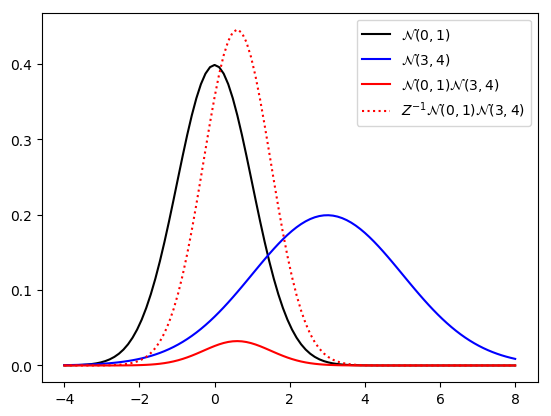

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[1]:9
└ @ Core In[1]:9


In [1]:
using PyPlot, Distributions
d1 = Normal(0, 1) # μ=0, σ^2=1
d2 = Normal(3, 2) # μ=3, σ^2=4

# Calculate the parameters of the product d1*d2
s2_prod = (d1.σ^-2 + d2.σ^-2)^-1
m_prod = s2_prod * ((d1.σ^-2)*d1.μ + (d2.σ^-2)*d2.μ)
d_prod = Normal(m_prod, sqrt(s2_prod)) # Note that we neglect the normalization constant.

# Plot stuff
x = linspace(-4, 8, 100)
plot(x, pdf.(d1,x), "k")
plot(x, pdf.(d2,x), "b")
plot(x, pdf.(d1,x) .* pdf.(d2,x), "r-") # Plot the exact product
plot(x, pdf.(d_prod,x), "r:")          # Plot the normalized Gaussian product
legend([L"\mathcal{N}(0,1)", 
        L"\mathcal{N}(3,4)", 
        L"\mathcal{N}(0,1) \mathcal{N}(3,4)", 
        L"Z^{-1} \mathcal{N}(0,1) \mathcal{N}(3,4)"]);

The solid and dotted red curves are identical up to a scaling factor $Z$.


### Multivariate Gaussian Multiplication

- In general, the multiplication of two multi-variate Gaussians yields an (unnormalized) Gaussian, see [SRG-6]:
$$\begin{equation*}
\mathcal{N}(x|\mu_a,\Sigma_a) \cdot \mathcal{N}(x|\mu_b,\Sigma_b) = \alpha \cdot \mathcal{N}(x|\mu_c,\Sigma_c)
\end{equation*}$$
where
$$\begin{align*}
\Sigma_c^{-1} &= \Sigma_a^{-1} + \Sigma_b^{-1} \\
\Sigma_c^{-1} \mu_c &= \Sigma_a^{-1}\mu_a + \Sigma_b^{-1}\mu_b
\end{align*}$$
and normalization constant $\alpha = \mathcal{N}(\mu_a|\, \mu_b, \Sigma_a + \Sigma_b)$.

- If we define the **precision** as $\Lambda \equiv \Sigma^{-1}$, then we see that **precisions add** and **precision-weighted means add** too.

- As we just saw, great application to Bayesian inference!

$$\begin{equation*}
\underbrace{\text{Gaussian}}_{\text{posterior}}
 \propto \underbrace{\text{Gaussian}}_{\text{likelihood}} \times \underbrace{\text{Gaussian}}_{\text{prior}}
\end{equation*}$$

### Conditioning and Marginalization of a Gaussian

- Let $z = \begin{bmatrix} x \\ y \end{bmatrix}$ be jointly normal distributed as

$$\begin{align*}
p(z) &= \mathcal{N}(z | \mu, \Sigma) 
  =\mathcal{N} \left( \begin{bmatrix} x \\ y \end{bmatrix} \left| \begin{bmatrix} \mu_x \\ \mu_y \end{bmatrix}, 
  \begin{bmatrix} \Sigma_x & \Sigma_{xy} \\ \Sigma_{yx} & \Sigma_y \end{bmatrix} \right. \right)
\end{align*}$$

- Since covariance matrices are by definition symmetric, it follows that $\Sigma_x$ and $\Sigma_y$ are symmetric and $\Sigma_{xy} = \Sigma_{yx}^T$.

- Let's factorize $p(x,y)$ into $p(y|x)\, p(x)$ through conditioning and marginalization (proof in Bishop pp.87-89)

  - **Conditioning**

$$\begin{align*}
p(y|x) &= p(x,y)/p(x) \\
 &= \mathcal{N}\left(y|\mu_y + \Sigma_{yx}\Sigma_x^{-1}(x-\mu_x),\, \Sigma_y - \Sigma_{yx}\Sigma_x^{-1}\Sigma_{xy} \right)
\end{align*}$$

  - **Marginalization**

$$
p(x) = \int p(x,y)\,\mathrm{d}y = \mathcal{N}\left( x|\mu_x, \Sigma_x \right)
$$

- Useful for applications to Bayesian inference in jointly Gaussian systems.

#### CODE EXAMPLE

Interactive plot of the joint, marginal, and conditional distributions.

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9e7c2e71fb50c257f708263a0218717e3479ba5f-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/9e7c2e71fb50c257f708263a0218717e3479ba5f-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

┌ Warning: `Matrix(m::Integer, n::Integer)` is deprecated, use `Matrix(undef, m, n)` instead.
│   caller = top-level scope at In[2]:11
└ @ Core In[2]:11
┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[2]:12
└ @ Core In[2]:12
┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[2]:12
└ @ Core In[2]:12
┌ Warning: The default `strides(a::AbstractArray)` implementation is deprecated for general arrays.
│ Specialize `strides(::LinearAlgebra.Adjoint)` if `LinearAlgebra.Adjoint` indeed uses a strided representation in memory.
│ Warning: inappropriately implementing this method for an array type that does not use strided
│ storage may lead to incorrect results or segfaults.
│   caller = stride at abstractarray.jl:350 [inlined]
└ @ Core ./abstractarray.jl:350
┌ Warning: The default `stri

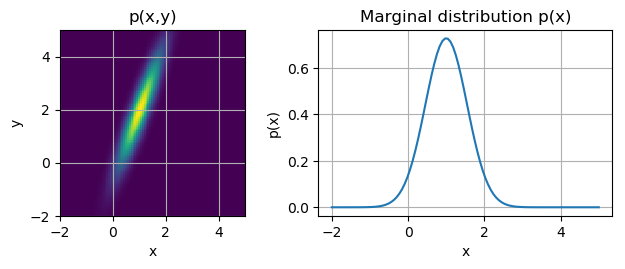

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = (::getfield(Main, Symbol("##4#7")){Float64})() at In[2]:35
└ @ Main ./In[2]:35


Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_05", 0, Any[SyncCallback(Scope("knockout-component-2ed73f66-471a-4995-8fd4-c2b5ae210fbb", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>51,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_03", ["-2.0", "-1.9", "-1.8", "-1.7", "-1.6", "-1.5", "-1.4", "-1.3", "-1.2", "-1.1"  …  "2.1", "2.2", "2.3", "2.4", "2.5", "2.6", "2.7", "2.8", "2.9", "3.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_04", "0.5", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_02", 26, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.1:3.0)), Observable{Float64}("ob_01", 0.5, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.1:3.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##3#6,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##3#6,Observable{Any}}(##3#6(), Observable{Any}("ob_06", Figure(PyObject <Figure size 640x480 with 1 Axes>), Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.1:3.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/isenoz/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/isenoz/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/isenoz/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/Users/isenoz/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/Users/isenoz/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAl
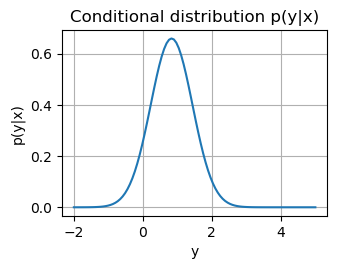
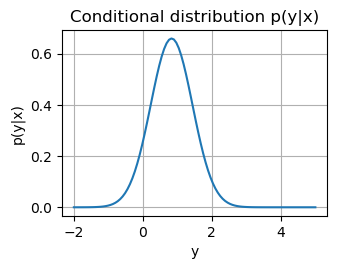

In [2]:
using Reactive, Interact, PyPlot, Distributions
# z = [x; y]
μ = [1.; 2.]
Σ = [0.3 0.7;
     0.7 2.0]
joint = MvNormal(μ,Σ)
marginal_x = Normal(μ[1], sqrt(Σ[1,1]))

# Plot p(x,y)
subplot(221)
joint_pdf = Matrix(100,100)
x_range = linspace(-2,5,100); y_range = linspace(-2,5,100)
for i=1:length(x_range)
    for j=1:length(y_range)
        joint_pdf[i,j] = pdf(joint, [x_range[i];y_range[j]])
    end
end

imshow(joint_pdf', origin="lower", extent=[x_range[1], x_range[end], y_range[1], y_range[end]])
grid(); xlabel("x"); ylabel("y"); title("p(x,y)"); tight_layout()

# Plot p(x)
subplot(222)
plot(linspace(-2,5,100), pdf.(marginal_x, linspace(-2,5,100)))
grid(); xlabel("x"); ylabel("p(x)"); title("Marginal distribution p(x)"); tight_layout()

f = figure()
@manipulate for x=-2:0.1:3; withfig(f) do
        conditional_y_m = μ[2]+Σ[2,1]*inv(Σ[1,1])*(x-μ[1])
        conditional_y_s2 = Σ[2,2] - Σ[2,1]*inv(Σ[1,1])*Σ[1,2]
        conditional_y = Normal(conditional_y_m, sqrt.(conditional_y_s2))

        # Plot p(y|x)
        subplot(223)
        plot(linspace(-2,5,100), pdf.(conditional_y, linspace(-2,5,100)))
        grid(); xlabel("y"); ylabel("p(y|x)"); title("Conditional distribution p(y|x)"); tight_layout()
    end
end

As is clear from the plots, the conditional distribution is a renormalized slice from the joint distribution.


### Example: Conditioning of Gaussian

- Consider (again) the system 

$$\begin{align*}
x &= \theta + \epsilon \\
\theta &\sim \mathcal{N}(\theta|\mu_\theta,\sigma_\theta^2) \\
\epsilon &\sim \mathcal{N}(\epsilon|0,\sigma^2_{\epsilon})
\end{align*}$$

- This system is equivalent to <span style="color:green">(derive this!)</span>

$$
p(x,\theta|\,\mu,\sigma) = \mathcal{N} \left( \begin{bmatrix} x\\ 
  \theta  \end{bmatrix} 
  \left| \begin{bmatrix} \mu_\theta\\ 
  \mu_\theta\end{bmatrix}, 
         \begin{bmatrix} \sigma_\theta^2+\sigma_{\epsilon}^2  & \sigma_\theta^2\\ 
         \sigma_\theta^2 &\sigma_\theta^2 
  \end{bmatrix} 
  \right. \right)
$$

- Direct substitution of the rule for Gaussian conditioning leads to <span style="color:green">(derive this yourself!)</span>
$$\begin{align*}
p(\theta|x) &= \mathcal{N} \left( \theta\,|\,\mu_{\theta|x}, \sigma_{\theta|x}^2 \right)\,, \quad
\text{with} \\
K &= \frac{\sigma_\theta^2}{\sigma_\theta^2+\sigma_{\epsilon}^2} \qquad \text{($K$ is called: Kalman gain)}\\
\mu_{\theta|x} &= \mu_\theta + K \cdot (x-\mu_\theta)\\
\sigma_{\theta|x}^2 &= \left( 1-K \right) \sigma_\theta^2  
\end{align*}$$
 


$\longrightarrow$ Moral: For jointly Gaussian systems, we can do inference simply in one step by using the formulas for conditioning and marginalization.

### Application: Recursive Bayesian Estimation

Now consider the signal $x_t=\theta+\epsilon_t$, where $D_t= \left\{x_1,\ldots,x_t\right\}$ is observed _sequentially_ (over time).

<span style="color:blue">[Question]</span>
- Derive a recursive algorithm for $p(\theta|D_t)$, i.e., an update rule for (posterior) $p(\theta|D_t)$ based on (prior) $p(\theta|D_{t-1})$ and (new observation) $x_t$.
 

<span style="color:blue">[Answer]</span> 

- Let's define the estimate after $t$ observations (i.e., our solution) as $p(\theta|D_t) = \mathcal{N}(\theta\,|\,\mu_t,\sigma_t^2)$.

- **Model specification**. We define the joint distribution for $\theta$ and $x_t$, given background $D_{t-1}$, by
$$\begin{align*} p(x_t,\theta \,|\, D_{t-1}) &= p(x_t|\theta) \, p(\theta|D_{t-1}) \\
  &= \underbrace{\mathcal{N}(x_t\,|\, \theta,\sigma^2_{\epsilon})}_{\text{likelihood}} \, \underbrace{\mathcal{N}(\theta\,|\,\mu_{t-1},\sigma_{t-1}^2)}_{\text{prior}}
\end{align*}$$
 

       
- **Inference**. Use Bayes rule,
$$\begin{align*}
p(\theta|D_t) &\propto p(x_t|\theta) \, p(\theta|D_{t-1}) \\
 &= \mathcal{N}(x_t|\theta,\sigma^2_{\epsilon}) \, \mathcal{N}(\theta\,|\,\mu_{t-1},\sigma_{t-1}^2) \\
 &= \mathcal{N}(\theta|x_t,\sigma^2_{\epsilon}) \, \mathcal{N}(\theta\,|\,\mu_{t-1},\sigma_{t-1}^2) \\
 &= \mathcal{N}(\theta|\mu_t,\sigma_t^2)
\end{align*}$$
with
$$\begin{align*}
K_t &= \frac{\sigma_{t-1}^2}{\sigma_{t-1}^2+\sigma_{\epsilon}^2} \qquad \text{(Kalman gain)}\\
\mu_t &= \mu_{t-1} + K_t \cdot (x_t-\mu_{t-1})\\
\sigma_t^2 &= \left( 1-K_t \right) \sigma_{t-1}^2 
\end{align*}$$
(as before, we used the formulas for conditioning in a multivariate Gaussian system). 

- This linear _sequential_ estimator of mean and variance in Gaussian observations is called a **Kalman Filter**.

<!--- - The new observation $x_t$ 'updates' the old estimate $\mu_{t-1}$ by a quantity that is proportional to the _innovation_ (or _residual_)  $\left( x_t - \mu_{t-1} \right)$.
---> 

- Note that the uncertainty about $\theta$ decreases over time (since $0<(1-K_t)<1$). This makes sense: since we assume that the statistics of the system do not change (stationarity), each new sample provides new information. 

- Recursive Bayesian estimation is the basis for **adaptive signal processing** algorithms such as Least Mean Squares (LMS) and Recursive Least Squares (RLS). 

#### CODE EXAMPLE

Let's implement the Kalman filter described above. We'll use it to recursively estimate the value of $\theta$ based on noisy observations. Use the 'Step' button to see the recursive updates to the posterior $p(\theta|D)$.

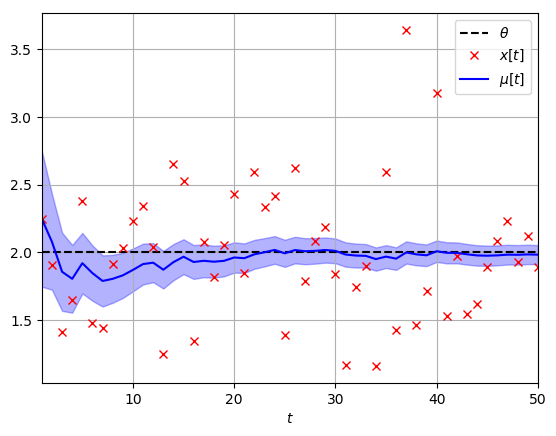

┌ Warning: `a::AbstractArray + b::Number` is deprecated, use `a .+ b` instead.
│   caller = top-level scope at In[3]:7
└ @ Core In[3]:7
┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = top-level scope at In[3]:11
└ @ Core In[3]:11
┌ Warning: `Array{T, 1}(m::Int) where T` is deprecated, use `Array{T, 1}(undef, m)` instead.
│   caller = top-level scope at In[3]:12
└ @ Core In[3]:12


In [3]:
using PyPlot, Reactive, Interact

interactive_plot = false # Set to true to generate an interactive plot with 'step' button
N = 50                   # Number of observations
θ = 2.0                  # True value of the variable we want to estimate
σ_ϵ2 = 0.25              # Observation noise variance
x = sqrt(σ_ϵ2) * randn(N) + θ # Generate N noisy observations of θ

f = figure()
global t = 0
global μ = fill!(Vector{Float64}(N), NaN)    # Means of p(θ|D) over time
global σ_μ2 = fill!(Vector{Float64}(N), NaN) # Variances of p(θ|D) over time

function performKalmanStep()
    # Perform a Kalman filter step, update t, μ, σ_μ2
    global t += 1
    if t>1 # Use posterior from prev. step as prior
        K = σ_μ2[t-1] / (σ_ϵ2 + σ_μ2[t-1]) # Kalman gain
        μ[t] = μ[t-1] + K*(x[t] - μ[t-1])  # Update mean using (1)
        σ_μ2[t] = σ_μ2[t-1] * (1.0-K)      # Update variance using (2)
    elseif t==1 # Use prior
        # Prior p(θ) = N(0,1000)
        K = 1000.0 / (σ_ϵ2 + 1000.0) # Kalman gain
        μ[t] = 0 + K*(x[t] - 0)      # Update mean using (1)
        σ_μ2[t] = 1000 * (1.0-K)     # Update variance using (2)
    end
end

function plotStatus()
    # Plot the 'true' value of θ, noisy observations x, and the recursively updated posterior p(θ|D)
    t = collect(1:N)
    plot(t, θ*ones(N), "k--")
    plot(t, x, "rx")
    plot(t, μ, "b-")
    fill_between(t, μ-sqrt.(σ_μ2), μ+sqrt.(σ_μ2), color="b", alpha=0.3)
    legend([L"\theta", L"x[t]", L"\mu[t]"])
    xlim((1, N)); xlabel(L"t"); grid()
end

if interactive_plot
    @manipulate for 
        perform_step = button("Step");
        withfig(f) do
            if t<=N
                performKalmanStep()
                plotStatus()
            end
        end
    end 
else
    while t<N
        performKalmanStep()
    end
    plotStatus()
end



The shaded area represents 2 standard deviations of posterior $p(\theta|D)$. The variance of the posterior is guaranteed to decrease monotonically for the standard Kalman filter.


### Product of Normally Distributed Variables

- (We've seen that) the sum of two Gausssian distributed variables is also Gaussian distributed.

- Has the _product_ of two Gaussian distributed variables also a Gaussian distribution?

- **No**! In general this is a difficult computation. As an example, let's compute $p(z)$ for $Z=XY$ for the special case that $X\sim \mathcal{N}(0,1)$ and $Y\sim \mathcal{N}(0,1)$.
$$\begin{align*}
p(z) &= \int_{X,Y} p(z|x,y)\,p(x,y)\,\mathrm{d}x\mathrm{d}y \\
  &= \frac{1}{2 \pi}\int  \delta(z-xy) \, e^{-(x^2+y^2)/2} \, \mathrm{d}x\mathrm{d}y \\
  &=  \frac{1}{\pi} \int_0^\infty \frac{1}{x} e^{-(x^2+z^2/x^2)/2} \, \mathrm{d}x \\
  &= \frac{1}{\pi} \mathrm{K}_0( \lvert z\rvert )\,.
\end{align*}$$
where  $\mathrm{K}_n(z)$ is a [modified Bessel function of the second kind](http://mathworld.wolfram.com/ModifiedBesselFunctionoftheSecondKind.html).

#### CODE EXAMPLE

We plot $p(Z)$ to give an idea of what this distribution looks like.

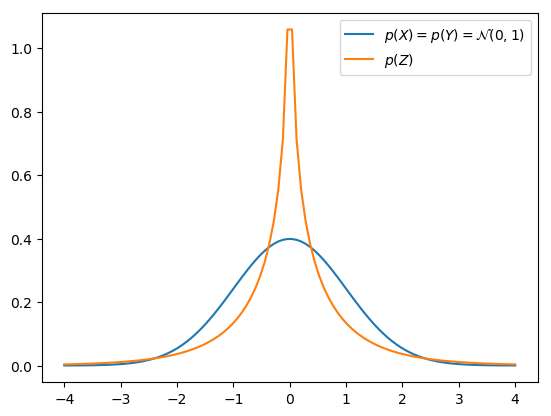

┌ Warning: `linspace(start, stop, length::Integer)` is deprecated, use `range(start, stop=stop, length=length)` instead.
│   caller = top-level scope at In[9]:4
└ @ Core In[9]:4


In [9]:
using PyPlot, Distributions, SpecialFunctions
X = Normal(0,1)
pdf_product_std_normals(z::Vector) = (besselk.(0, abs.(z))./π)
range = collect(linspace(-4,4,100))
plot(range, pdf.(X, range))
plot(range, pdf_product_std_normals(range))
legend([L"p(X)=p(Y)=\mathcal{N}(0,1)", L"p(Z)"]);

### Review Gaussians

The success of Gaussian distributions in probabilistic modeling is large due to the following properties:

- A linear transformation of a Gaussian distributed variable is also Gaussian distributed

- The convolution of two Gaussian functions is another Gaussian function (use in sum of 2 variables)

- The product of two Gaussian functions is another Gaussian function (use in Bayes rule). 

- Conditioning and marginalization of multivariate Gaussian distributions produce Gaussians again (use in working with observations and when doing Bayesian predictions)

- <span style="color:gray">The Gaussian PDF has higher entropy than any other with the same variance. (Not discussed in this course).</span>

- <span style="color:gray">Any smooth function with single rounded maximum, if raised to higher and higher powers, goes into a Gaussian function. (Not discussed).</span>

### Some Useful Matrix Calculus

Aside from working with Gaussians, it will be helpful for the next lessons to be familiar with some matrix calculus. We shortly recapitulate used formulas here. 

- We define the **gradient** of a scalar function $f(A)$ w.r.t. an $n \times k$ matrix $A$ as
$$
\nabla_A f \triangleq
    \begin{bmatrix}
\frac{\partial{f}}{\partial a_{11}} & \frac{\partial{f}}{\partial a_{12}} & \cdots & \frac{\partial{f}}{\partial a_{1k}}\\
\frac{\partial{f}}{\partial a_{21}} & \frac{\partial{f}}{\partial a_{22}} & \cdots & \frac{\partial{f}}{\partial a_{2k}}\\
\vdots & \vdots & \cdots & \vdots\\
\frac{\partial{f}}{\partial a_{n1}} & \frac{\partial{f}}{\partial a_{n2}} & \cdots & \frac{\partial{f}}{\partial a_{nk}}
    \end{bmatrix}
$$
 

   
- The following formulas are useful (see Bishop App.-C)
$$\begin{align*}
|A^{-1}|&=|A|^{-1} \tag{B-C.4} \\
\nabla_A \log |A| &= (A^{T})^{-1} = (A^{-1})^T \tag{B-C.28} \\
\mathrm{Tr}[ABC]&= \mathrm{Tr}[CAB] = \mathrm{Tr}[BCA] \tag{B-C.9} \\
\nabla_A \mathrm{Tr}[AB] &=\nabla_A \mathrm{Tr}[BA]= B^T \tag{B-C.25} \\
\nabla_A \mathrm{Tr}[ABA^T] &= A(B+B^T)  \tag{B-C.27}\\
 \nabla_x x^TAx &= (A+A^T)x \tag{from B-C.27}\\
\nabla_X a^TXb &= \nabla_X \mathrm{Tr}[ba^TX] = ab^T \notag
\end{align*}$$

### What's Next?

- We discussed how Bayesian probability theory provides an integrated framework for making predictions based on observed data.

- The process involves model specification (your main task!), inference and actual model-based prediction.

- The latter two tasks are only difficult because of computational issues.

- Maximum likelihood was introduced as a computationally simpler approximation to the Bayesian approach.

- In particular under some linear Gaussian assumptions, a few interesting models can be designed.

- The rest of this course (part-1) concerns introduction to these Linear Gaussian models.

---
The slide below loads the style file

In [5]:
open("../../styles/aipstyle.html") do f
    display("text/html", readstring(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->

┌ Warning: `readstring(s::IO)` is deprecated, use `read(s, String)` instead.
│   caller = #15 at In[5]:2 [inlined]
└ @ Core ./In[5]:2
